# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [320]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [321]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [322]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [323]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

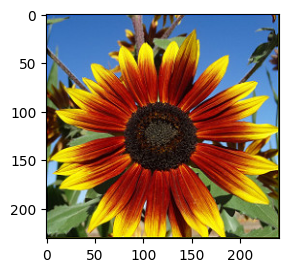

In [324]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

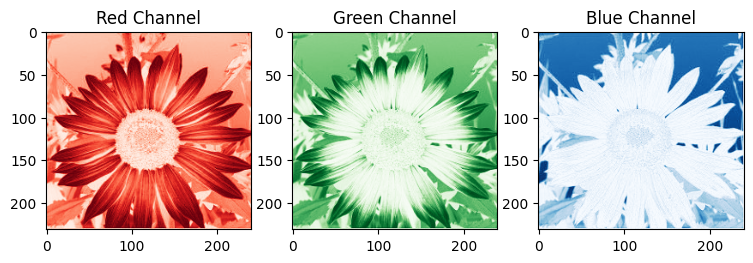

In [325]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [326]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

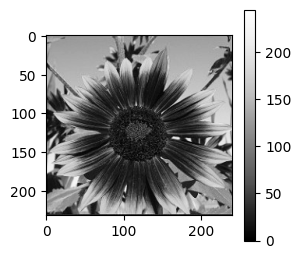

In [327]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**
Можно, но это не оптимально. Среднее значение (R+G+B)/3 не учитывает разную чувствительность глаза к цветам (зелёный воспринимается ярче, чем красный и синий). Лучше использовать стандартные коэффициенты (0.299R + 0.587G + 0.114B)

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**
cmap='Greys' отображает 0 как чёрный, 255 как белый.
cmap='Greys_r' инвертирует цвета: 0 → белый, 255 → чёрный.
Разница только в порядке оттенков, данные не меняются.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [328]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

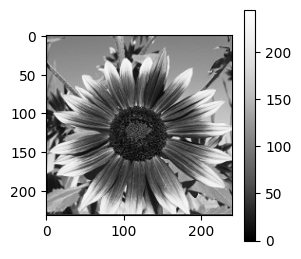

In [329]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [330]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [331]:
def convert_rgb_to_grayscale(img_rgb):
    # pass  # your code here
    luminance_coeffs = np.array([0.29901, 0.58701, 0.114], dtype=np.float32)
    grayscale = np.dot(img_rgb[..., :3], luminance_coeffs)
    return np.round(grayscale).astype(np.uint8)
    

In [332]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [333]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

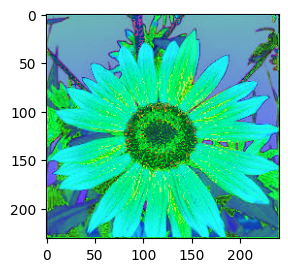

In [334]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

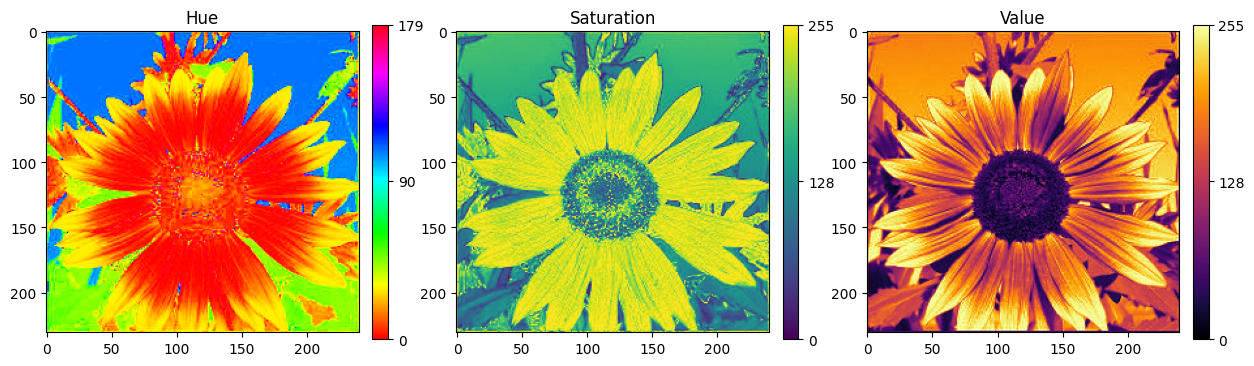

In [335]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

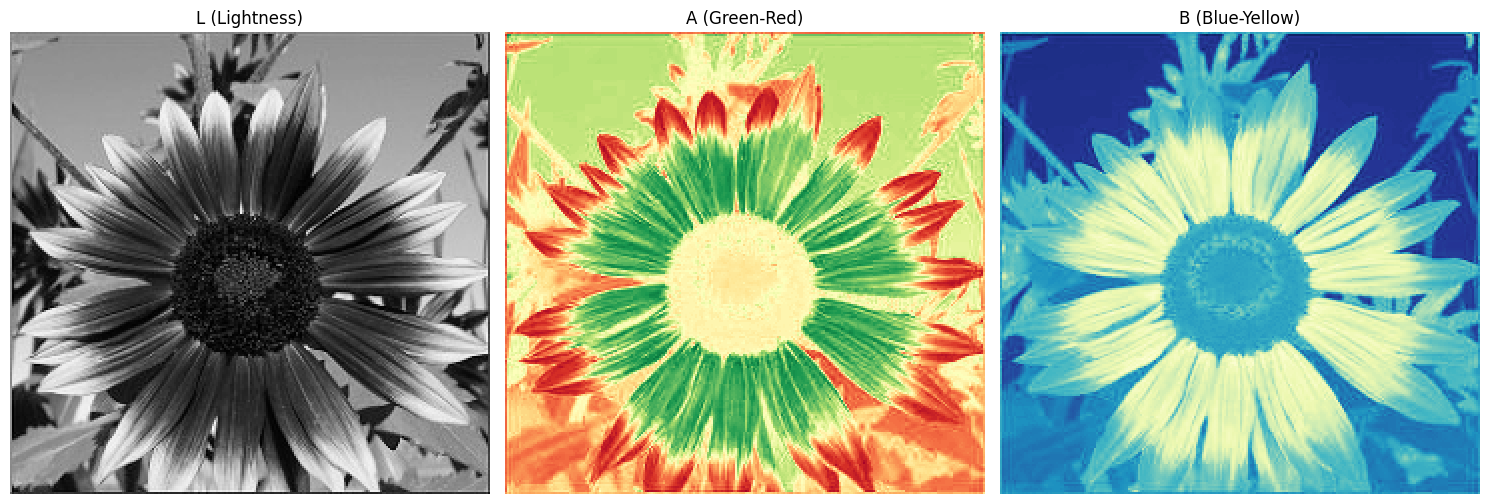

In [336]:
# your code here
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Convertir a espacio de color LAB
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

# Separar canales
l, a, b = cv2.split(img_lab)

# Mostrar los canales
fig, axs = plt.subplots(1, 3, figsize=[15, 5])

axs[0].imshow(l, cmap='gray')
axs[0].set_title('L (Lightness)')

axs[1].imshow(a, cmap='RdYlGn')
axs[1].set_title('A (Green-Red)')

axs[2].imshow(b, cmap='YlGnBu')
axs[2].set_title('B (Blue-Yellow)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
Переход из RGB в пространство LAB полезен, когда нужно отдельно обрабатывать яркость и цвет. Например, компонент L показывает освещённость, а A и B — цветовую информацию. Это удобно для улучшения контраста, обработки теней и анализа цвета без влияния освещения. В моём примере я использовал LAB, чтобы визуализировать яркость и цветовые каналы по отдельности.


# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [337]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [338]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [339]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

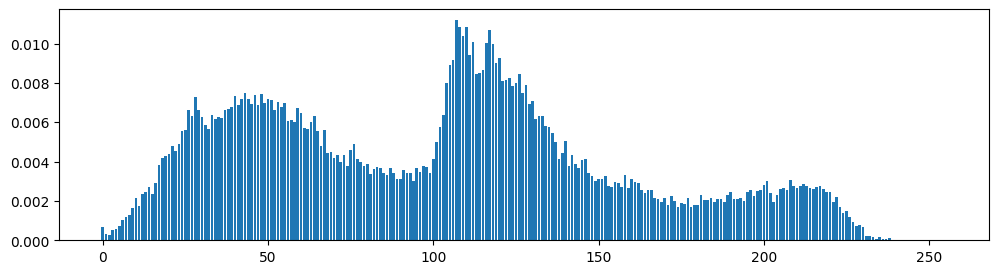

In [340]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [341]:
def compute_hist(img):
    # pass  # your code here
    hist = np.zeros(256, dtype=int)
    for value in img.flatten():
        hist[value] += 1
    return hist

In [342]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

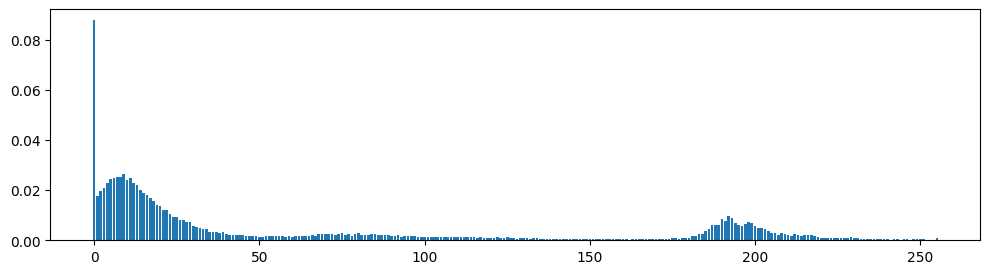

In [343]:
visualize_hist(hist_r)

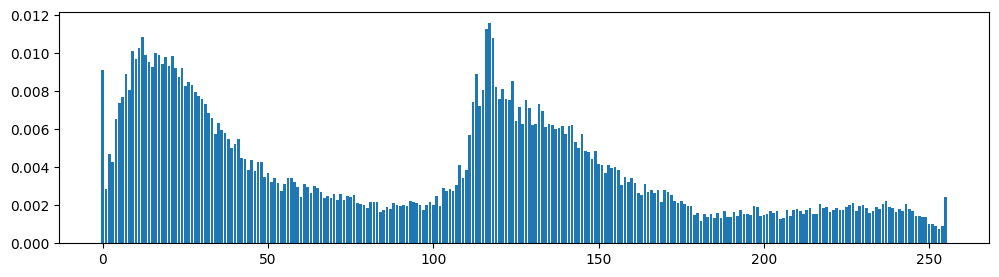

In [344]:
visualize_hist(hist_g)

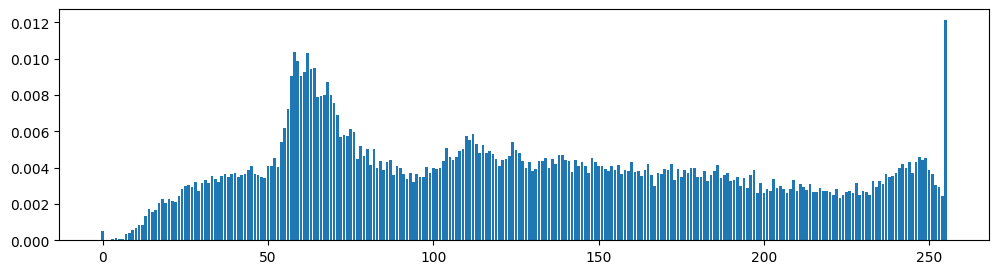

In [345]:
visualize_hist(hist_b)

In [346]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**
По гистограмме можно понять, тёмное или светлое изображение, есть ли на нём тени или яркие участки. Также видно, хороший ли у него контраст.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**
При смене камеры гистограмма может резко измениться. При изменении освещения она сдвигается — становится светлее или темнее. Когда меняется сцена, гистограмма тоже меняется, потому что появляются другие цвета и яркости.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

Histogram for JPEG Quality: 90
Histogram for JPEG Quality: 60
Histogram for JPEG Quality: 30
Histogram for JPEG Quality: 5


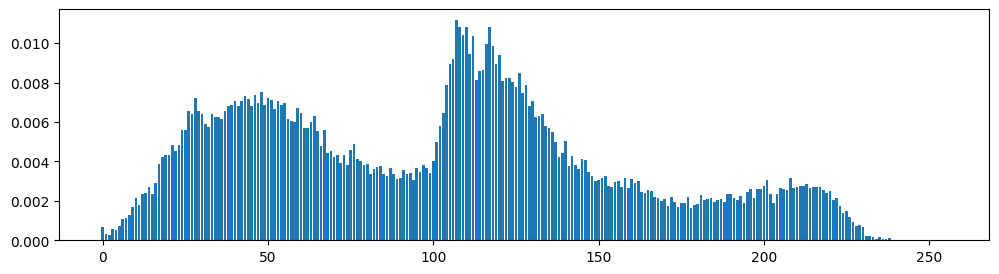

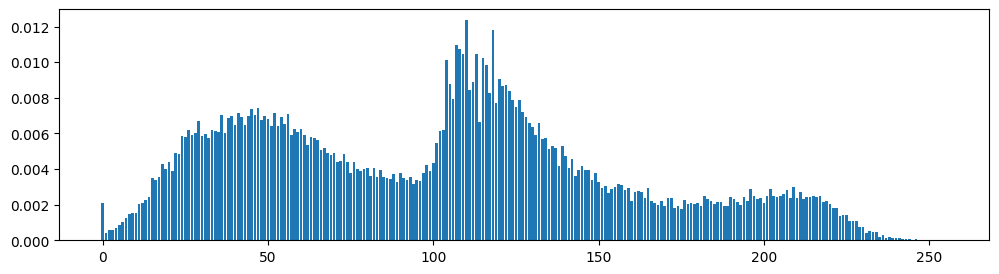

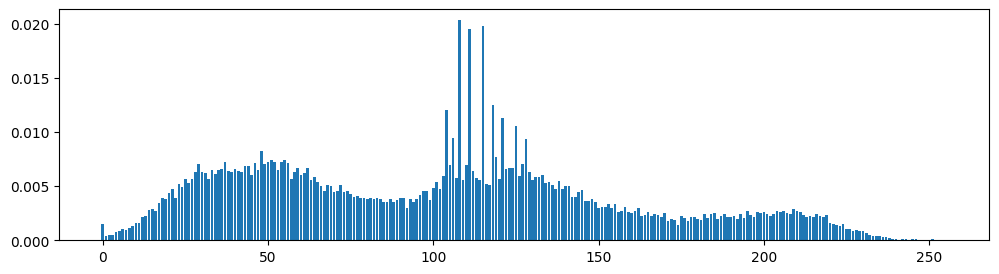

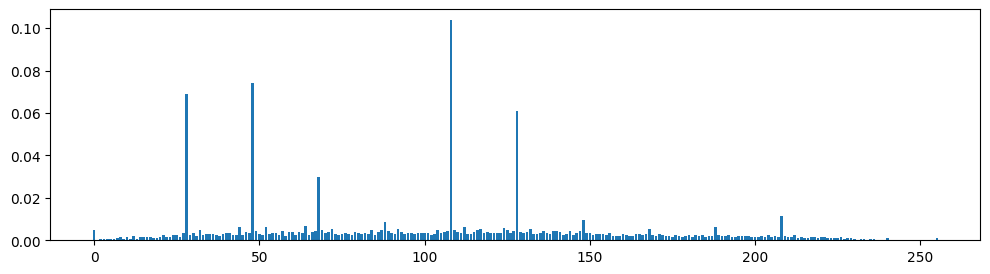

In [347]:
compression_qualities = [90, 60, 30, 5]

for quality in compression_qualities:

    temp_filename = f"temp_img_gray_q{quality}.jpg"
    cv2.imwrite(temp_filename, img_gray, [cv2.IMWRITE_JPEG_QUALITY, quality])

    compressed_img = cv2.imread(temp_filename, cv2.IMREAD_GRAYSCALE)

    hist_compressed = compute_hist(compressed_img)

    print(f"Histogram for JPEG Quality: {quality}")
    visualize_hist(hist_compressed)

    import os
    os.remove(temp_filename)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

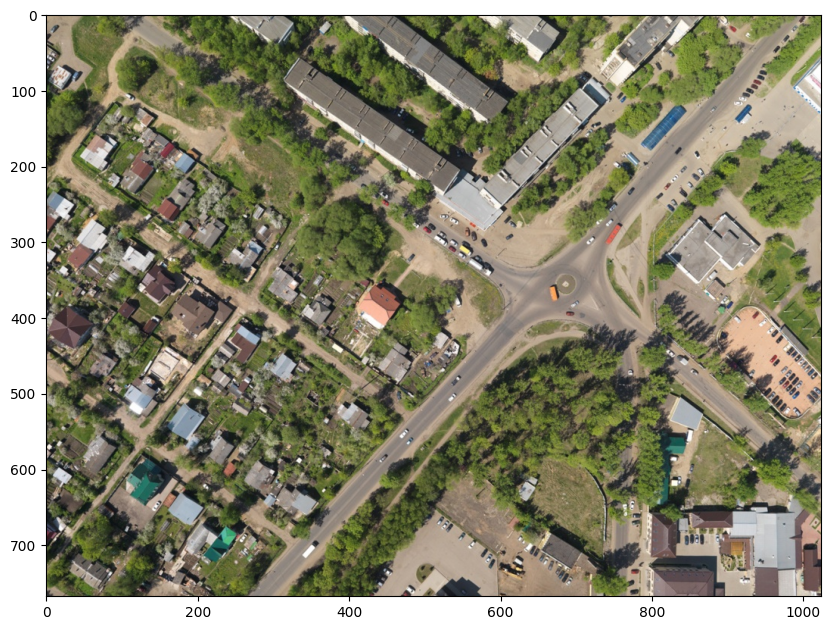

In [348]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

In [349]:
# your code here

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [ ]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        # your code here
        self.integral_img = img.astype(np.int64).cumsum(axis=0).cumsum(axis=1)


    def sum(self, x, y, w, h):
        # your code here
        x2 = x + w - 1
        y2 = y + h - 1

        # D: Valor de la imagen integral en la esquina inferior derecha.
        D = self.integral_img[y2, x2]

        # B: Valor de la imagen integral en el punto (x2, y-1).
        # Representa la suma del área por encima de nuestro rectángulo.
        # Si y es 0, el rectángulo comienza en la primera fila, no hay área "por encima", así que B es 0.
        B = self.integral_img[y - 1, x2] if y > 0 else 0

        # C: Valor de la imagen integral en el punto (x-1, y2).
        # Representa la suma del área a la izquierda de nuestro rectángulo.
        # Si x es 0, el rectángulo comienza en la primera columna, no hay área "a la izquierda", así que C es 0.
        C = self.integral_img[y2, x - 1] if x > 0 else 0

        # A: Valor de la imagen integral en el punto (x-1, y-1).
        # Esta área fue restada dos veces (en B y en C), por lo que debemos sumarla de nuevo
        # para aplicar correctamente el principio de inclusión-exclusión.
        # Si x o y es 0, esta área no existe, así que A es 0.
        A = self.integral_img[y - 1, x - 1] if x > 0 and y > 0 else 0

        # La suma total de los píxeles dentro del rectángulo se calcula con la fórmula: D - B - C + A [cite: 35]
        sum_val = D - B - C + A
        return sum_val


In [351]:
I = IntegralImage(img_gray)

In [352]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

Интегральное изображение полезно там, где нужно быстро считать суммы значений пикселей в прямоугольных областях. Например:

- Размытие (Box blur): Для очень быстрого размытия изображений.
- Детектирование объектов (Viola-Jones): Используется для быстрого вычисления признаков Хаара.
- Бинаризация изображений: Для адаптивной пороговой обработки.
- Расчет среднего/дисперсии в окне: Когда нужно знать среднюю яркость или разброс значений в локальных областях.

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
Метод расчета интегрального изображения следует методу динамического программирования.